# Chapter 9: The Future of Generative Modeling

## The Transformer

The Transformer was introduced in a [2017 paper](https://arxiv.org/abs/1706.03762) that showed it is possible to make models that predict sequential data without recurrent or convolutional layers. The model uses only an attention mechanism. The authors of the paper use it to for English-German and English-French translation. The model uses stacked attention mechanisms instead of a recurrent network.

### Positional Encoding

The Transformer transforms each sequence of 128 tokens into a 512-dimensional vector. Since the Transformer has no recurrent network, we need to somehow encode the position of each input token, we use a _positional encoding function_, defined below.

$$ \text{PE}_{pos,\,2i} = \sin\bigg(\frac{pos}{10000^{2i/d_\text{model}}}\bigg) $$

$$ \text{PE}_{pos,\,2i+1} = \cos\bigg(\frac{pos}{10000^{(2i + 1)/d_\text{model}}}\bigg)$$

At small values of $i$, the value fluctuates more quickly, whereas for larger values of $i$, the values will be closer together. The positional encoding function is added to the learned encoding matrix. Below is a plot demonstrating positional encoding.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sequence_len = 128
d_model = 512

pe = np.zeros((sequence_len, d_model))

for pos in range(sequence_len):
  for i in range(d_model // 2):
    pe[pos, 2 * i] = np.sin(pos / (10000 ** (2 * i / d_model)))
    pe[pos, (2 * i) + 1] = np.cos(pos / (10000 ** ((2 * i + 1) / d_model)))

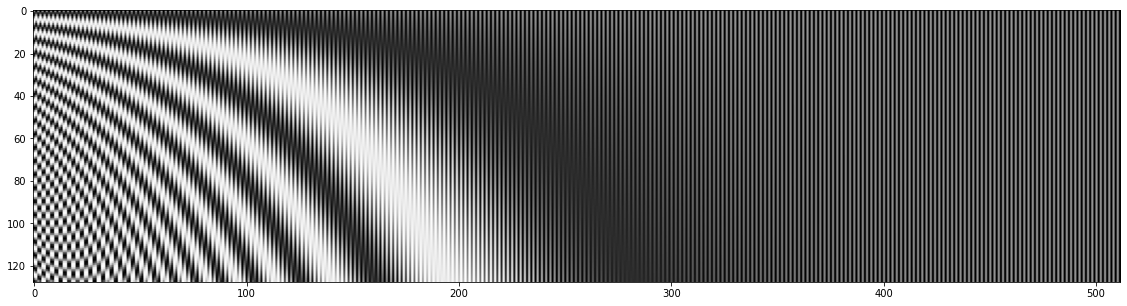

In [6]:
fig = plt.figure(figsize=(20,5))
plt.imshow(pe, cmap='Greys')

In [7]:
embedding = np.random.rand(sequence_len, d_model)

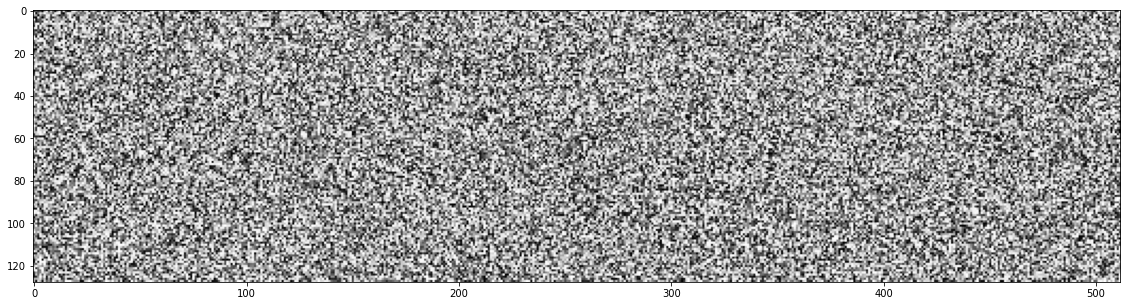

In [8]:
fig = plt.figure(figsize=(20,5))
plt.imshow(embedding, cmap='Greys')

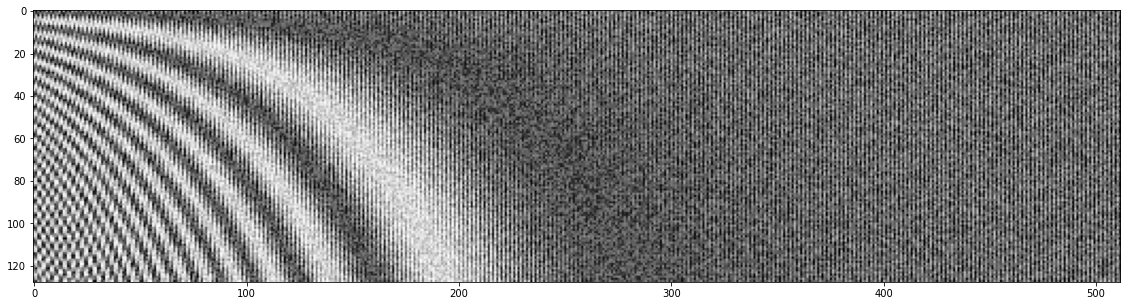

In [9]:
fig = plt.figure(figsize=(20,5))
plt.imshow(embedding + pe, cmap='Greys')

### Multihead Attention

The model then passes the embedded input into six encoder layers. Each encoder layer starts with a _multihead attention layer_. The layer requires two inputs: the query input, $x_Q$, and the key-value input $x_{KV}$.

TODO

### The Decoder

TODO

### Anaylzing the Transformer

TensorFlow provides [a notebook](https://colab.sandbox.google.com/github/tensorflow/tensor2tensor/blob/master/tensor2tensor/notebooks/hello_t2t.ipynb#scrollTo=OJKU36QAfqOC) that lets you use a trained Transformer model for English-German translation.